In [44]:
from pandas import *

In [45]:
## Exercise 1: Creating the data

In [46]:
headings = ['Country', 'GDP (US$)']
table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=headings, data=table)
gdp

,Country,GDP (US$)
0,UK,2.678455e+12
1,USA,1.676810e+13
2,China,9.240270e+12
3,Brazil,2.245673e+12
4,South Africa,3.660579e+11


In [47]:
headings = ['Country name', 'Life expectancy (years)']
table = [
  ['China', 75],
  ['Russia', 71],  
  ['United States', 79],
  ['India', 66],
  ['United Kingdom', 81]
]
life = DataFrame(columns=headings, data=table)
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [48]:
## Exercise 2: Defining functions

In [49]:
def roundToMillions (value):
    result = round(value / 1000000)
    return result

In [50]:
def roundToMillions (value):
    return round(value / 1000000)

In [51]:
def usdToGbp(usd):
    return usd / 1.564768

In [52]:
roundToMillions(4567890.1) == 5

True

In [53]:
roundToMillions(0) == 0  # always test with zero...

True

In [54]:
roundToMillions(-1) == 0 # ...and negative numbers

False

In [55]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

usdToGBP(0) == 0

True

In [56]:
usdToGBP(1.564768) == 1

True

In [57]:
usdToGBP(-1) < 0

True

In [ ]:
## Exercise 3: What if...?

In [58]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    else:
        return name

expandCountry('India') == 'India'

True

In [59]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    if name == 'St.Lucia':
        name = 'Saint Lucia'
    return name

In [ ]:
## Exercise 4: Applying functions

In [60]:
gdp['Country name'] = gdp['Country'].apply(expandCountry)
gdp

,Country,GDP (US$),Country name
0,UK,2.678455e+12,United Kingdom
1,USA,1.676810e+13,United States
2,China,9.240270e+12,China
3,Brazil,2.245673e+12,Brazil
4,South Africa,3.660579e+11,South Africa


In [61]:
gdp['GDP (£m)'] = gdp['GDP (US$)'].apply(usdToGBP).apply(roundToMillions)
gdp

,Country,GDP (US$),Country name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


In [62]:
gdp['GDP (US$)'].apply(roundToMillions).apply(usdToGBP).apply(round)

0     1711727
1    10716029
2     5905201
3     1435148
4      233938
Name: GDP (US$), dtype: float64

In [63]:
headings = ['Country name', 'GDP (£m)']
gdp = gdp[headings]
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


In [ ]:
## Exercise 5: Joining left, right and centre

In [64]:
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [65]:
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


In [66]:
merge(gdp, life, on='Country name', how='left')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Brazil,1435148,NaN
4,South Africa,233937,NaN


In [67]:
merge(gdp, life, on='Country name', how='right')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Russia,NaN,71
4,India,NaN,66


In [68]:
merge(gdp, life, on='Country name', how='outer')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Brazil,1435148,NaN
4,South Africa,233937,NaN
5,Russia,NaN,71
6,India,NaN,66


In [69]:
gdpVsLife = merge(gdp, life, on='Country name', how='inner')
gdpVsLife

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75


In [ ]:
## Exercise 6: Constant variables

In [70]:
GDP_USD = 'GDP (US$)'
GDP_GBP = 'GDP (£m)'
GDP_USD

'GDP (US$)'

In [ ]:
## Exercise 7: Getting real

In [71]:
from pandas.io.wb import download

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
life = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
life.head()

,,SP.DYN.LE00.IN
country,year,
Arab World,2013,70.085925
Caribbean small states,2013,72.000083
Central Europe and the Baltics,2013,76.127583
East Asia & Pacific (all income levels),2013,74.894858
East Asia & Pacific (developing only),2013,73.982971


In [72]:
gdp = gdp.reset_index()
life = life.reset_index()
life.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.085925
1,Caribbean small states,2013,72.000083
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.894858
4,East Asia & Pacific (developing only),2013,73.982971


In [73]:
POP_INDICATOR = 'SP.POP.TOTL'
totalPopulation = download(indicator=POP_INDICATOR, country='all')
totalPopulation.reset_index()
totalPopulation = totalPopulation[102:]
totalPopulation.head()

SP.POP.TOTL
country     year             
Afghanistan 2005     24399948
            2004     23499850
            2003     22507368
Albania     2005      3011487
            2004      3026939

In [ ]:
## Exercise 8: Cleaning up

In [74]:
life[0:3]

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.085925
1,Caribbean small states,2013,72.000083
2,Central Europe and the Baltics,2013,76.127583


In [75]:
life[240:]

,country,year,SP.DYN.LE00.IN
240,Uzbekistan,2013,68.227585
241,Vanuatu,2013,71.686829
242,"Venezuela, RB",2013,74.643098
243,Vietnam,2013,75.756488
244,Virgin Islands (U.S.),2013,79.624390
245,West Bank and Gaza,2013,73.203341
246,"Yemen, Rep.",2013,63.089585
247,Zambia,2013,58.092780
248,Zimbabwe,2013,59.773488


In [76]:
gdp = gdp[34:]
life = life[34:]
gdp.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.031088e+10
35,Albania,2013,1.291667e+10
36,Algeria,2013,2.101834e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


In [77]:
gdp = gdp.dropna()
life = life.dropna()
gdp.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.031088e+10
35,Albania,2013,1.291667e+10
36,Algeria,2013,2.101834e+11
38,Andorra,2013,3.249101e+09
39,Angola,2013,1.241632e+11


In [78]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdp = gdp[headings]
headings = [COUNTRY, LIFE_INDICATOR]
life = life[headings]
life.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.931415
35,Albania,77.537244
36,Algeria,71.009659
39,Angola,51.866171
40,Antigua and Barbuda,75.829293


In [ ]:
## Exercise 9: Joining and transforming

In [79]:
gdpVsLife = merge(gdp, life, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,2.031088e+10,60.931415
1,Albania,1.291667e+10,77.537244
2,Algeria,2.101834e+11,71.009659
3,Angola,1.241632e+11,51.866171
4,Antigua and Barbuda,1.200588e+09,75.829293


In [80]:
GDP = 'GDP (£m)'
column = gdpVsLife[GDP_INDICATOR]
gdpVsLife[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLife.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2.031088e+10,60.931415,12980
1,Albania,1.291667e+10,77.537244,8255
2,Algeria,2.101834e+11,71.009659,134322
3,Angola,1.241632e+11,51.866171,79349
4,Antigua and Barbuda,1.200588e+09,75.829293,767


In [81]:
LIFE = 'Life expectancy (years)'
gdpVsLife[LIFE] = gdpVsLife[LIFE_INDICATOR].apply(round)
gdpVsLife.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2.031088e+10,60.931415,12980,61
1,Albania,1.291667e+10,77.537244,8255,78
2,Algeria,2.101834e+11,71.009659,134322,71
3,Angola,1.241632e+11,51.866171,79349,52
4,Antigua and Barbuda,1.200588e+09,75.829293,767,76


In [82]:
headings = [COUNTRY, GDP, LIFE]
gdpVsLife = gdpVsLife[headings]
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,12980,61
1,Albania,8255,78
2,Algeria,134322,71
3,Angola,79349,52
4,Antigua and Barbuda,767,76


In [83]:
## Exercise 10: Correlation

In [84]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

('The correlation is', 0.49247866876216989)
It is statistically significant.


In [87]:
## Exercise 11: Scattetplots

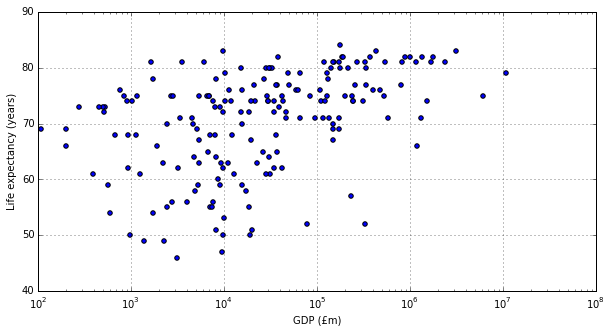

In [89]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10,5))

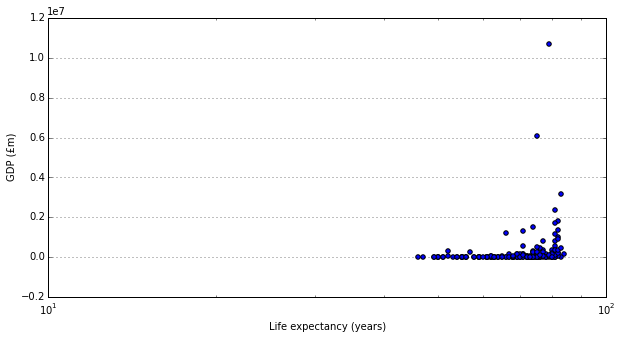

In [94]:
%matplotlib inline
gdpVsLife.plot(x=LIFE, y=GDP, kind='scatter', grid=True, logx=True, figsize=(10,5))